<a href="https://colab.research.google.com/github/Abharath124/Deep-Learning/blob/main/AU_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Neural Network using Tensorflow

In [10]:
# import requirement lobraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [11]:
import matplotlib.pyplot as plt


In [12]:
#Load the dataset
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

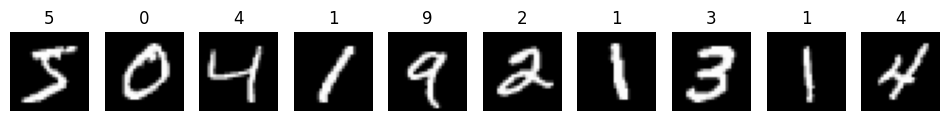

In [13]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,10, i+1)   # 2 rows, 5 columns
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [14]:
#Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
#OHE
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#Build Neural Network
model = Sequential([
    Flatten(input_shape = (28,28)), #Flatten 2D image to 1D
    Dense(128,activation='relu'), #hidden layer with 128 neurons
    Dense(64,activation='relu'), #hidden layer with 64 neurons
    Dense(10,activation='softmax') #output layer with 10 neurons
])

In [17]:
#Comiple the model
model.compile(
    optimizer = 'adam', #Adam (Adaptive Moment Estimation) Most popular, adaptive learning rate + momentum. Works well in practice for most problems.
    loss='categorical_crossentropy',  #L= −i=1∑C ​yi​⋅log(y^​i​)   yi =  true label (0 or 1, one-hot encoded) ,y^i = predicted probability
    metrics = ['accuracy']   # Formula : TP+TN / TP+TN+FP+FN
)

In [19]:
#Train the model
history = model.fit(
    X_train,y_train ,
    epochs = 6,
    batch_size = 32,
    validation_split =0.1
)

Epoch 1/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0337 - val_accuracy: 0.9807 - val_loss: 0.0679
Epoch 2/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9725 - val_loss: 0.0997
Epoch 3/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9793 - val_loss: 0.0737
Epoch 4/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9732 - val_loss: 0.0971
Epoch 5/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9747 - val_loss: 0.1041
Epoch 6/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0179 - val_accuracy: 0.9818 - val_loss: 0.0859


In [23]:
#Evaluatre the model
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1177
Test accuracy: 97.86%


In [24]:
#Make Prediction
prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
#Example predict the one image
import numpy as np
predicted_class = np.argmax(prediction[0])
print(f'Predicted digit:{predicted_class}')

Predicted digit:7
